# Trabalho da disciplina Projeto/MVP em Ciência de Dados

## Aluno: Luis Eduardo Ribeiro Veiga - RA: 40520223000855

## Notebook modelo Clássico - Classificador do dataset "Predict students' dropout and academic success"

**Descrição do Problema** - Criar um modelo de machine learning para prever o abandono escolar ou sucesso acadêmico de um aluno.

**Dataset** - O dataset foi criado a partir de dados de uma instituição de ensino superior relativo a estudantes inscritos em diferentes cursos. O dataset inclui informações relativas ao histórico acadêmico, dados demográficos, fatores sócio-econômicos e desempenho acadêmico dos alunos.

O dataset é composto de 4424 e 36 atributos.

Os targets presentes no dataset são: dropout, enrolled, and graduate.

### Importação de bibliotecas

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from urllib.parse import quote
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

### Funções utilitárias

In [2]:
# Plota informações sobre um dataset
def plot_dataset_class(p_dataset, p_title):
    print((p_dataset['Target']).value_counts())
    p_dataset['Target'].value_counts().plot.bar(title=p_title)

### Carga e preparação dos dados

Carrega o arquivo zip a partir da url, descompacta o arquivo e cria o dataset.

In [3]:
# Carga do dataset
uci_url = 'https://archive.ics.uci.edu/static/public/697/'
predict_student_file = 'predict+students+dropout+and+academic+success.zip'
request = urllib.request.urlopen(uci_url + urllib.parse.quote(predict_student_file))
zipfile = ZipFile(BytesIO(request.read()))
filepath = TextIOWrapper(zipfile.open('data.csv'), encoding='utf-8')
dataset = pd.read_csv(filepath, sep=';')

dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Apresenta informações sobre o dataset.

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


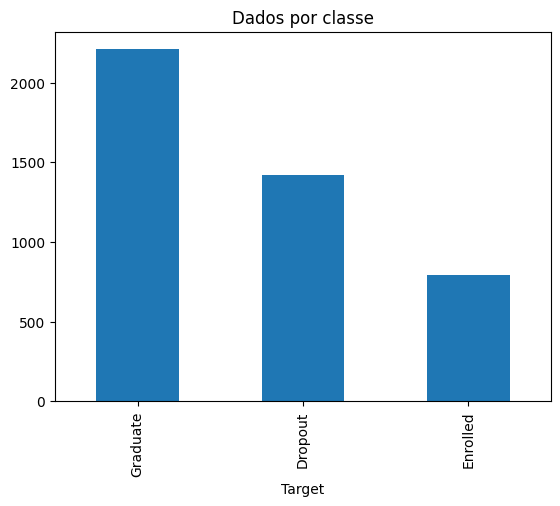

In [4]:
plot_dataset_class(dataset, 'Dados por classe')

Separa os dados do dataset em treino e teste.

In [5]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:36]
y = array[:,36]

**Seleção de atributos**

É utilizada a técnica de 'Seleção Univariada' para selecionar as variáveis que tenham maior relação com a variável de saída (target).

A rotina seleciona o melhor K e daí seleciona os atributos que correspondam a esse número.

In [6]:
# Seleção de atributos usando Seleção Univariada

# Calculando o melhor k
f1_score_list = []

model_LR = LogisticRegression(max_iter=200)

for k in range(1, 37):
    # Seleção de atributos com SelectKBest
    kbest_var = SelectKBest(score_func=f_classif, k=k)

    # Executa a função de pontuação e obtém os atributos selecionados
    kbest_var.fit(X, y)

    # Reduz X para os atributos selecionados
    features = kbest_var.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

    model_LR.fit(X_train, y_train)
    kbest_pred = model_LR.predict(X_test)    

    f1_score_kbest = round(f1_score(y_test, kbest_pred, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

# O melhor k selecionado
kbest = f1_score_list.index(max(f1_score_list)) + 1

# Seleção de atributos com o melhor k
kbest_var = SelectKBest(score_func=f_classif, k=kbest)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = kbest_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", dataset.columns[0:36])

# Exibe as pontuações de cada atributo e os escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) 
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", kbest_var.get_feature_names_out(input_features=dataset.columns[0:36]))

X = features


Número original de atributos: 36

Número reduzido de atributos: 13

Atributos Originais: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem 

### Criação de Pipelines

Define os folds para a validação cruzada. Serão utilizadas 10 partições em sua configuração.

In [7]:
# Criando os folds para a validação cruzada
num_splits = 10
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)

Configuração e avaliação dos modelos.

KNN: 0.704117 (0.028161)
CART: 0.677641 (0.015503)
NB: 0.717349 (0.033303)
SVM: 0.726404 (0.024232)
LR: 0.760966 (0.031134)
Bagging: 0.751280 (0.021899)
RF: 0.757410 (0.024318)
ET: 0.745458 (0.022584)
Ada: 0.748685 (0.027233)
GB: 0.765153 (0.026484)
Voting: 0.751599 (0.026791)


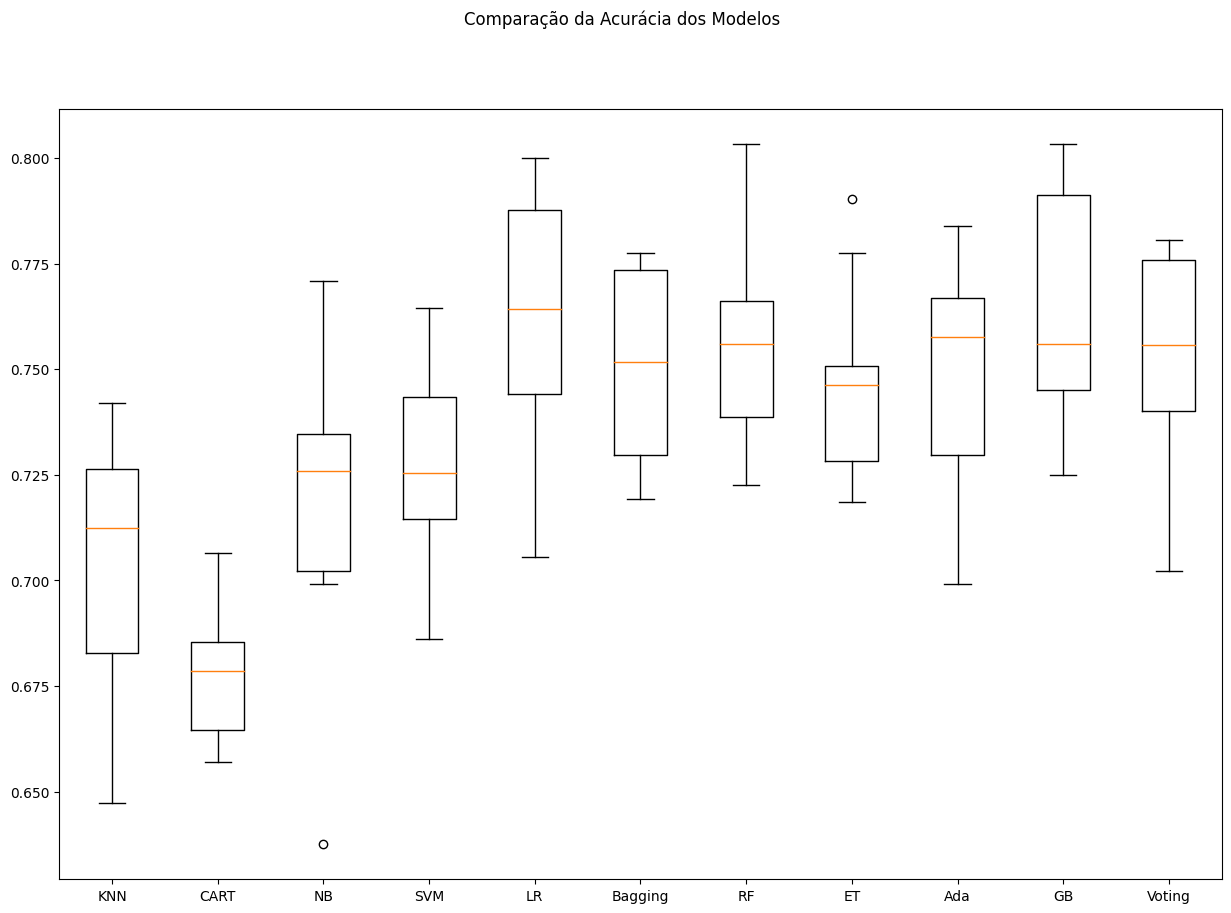

In [8]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(42)

# Divindindo o dataset em subconjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

# Listas para aramazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=200)))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('Logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Criando os elementos do Pipeline. Definição de algoritmos e transformações que serão utilizadas.

In [9]:
# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

Configuração e avaliação dos Pipelines.

LR-orig: 0.760966 (0.031134)
RF-orig: 0.761289 (0.026021)
GB-orig: 0.764830 (0.026588)
LR-padr: 0.760643 (0.028780)
RF-padr: 0.755805 (0.018721)
GB-padr: 0.765476 (0.026218)
LR-norm: 0.749655 (0.028323)
RF-norm: 0.757408 (0.025316)
GB-norm: 0.764830 (0.026588)


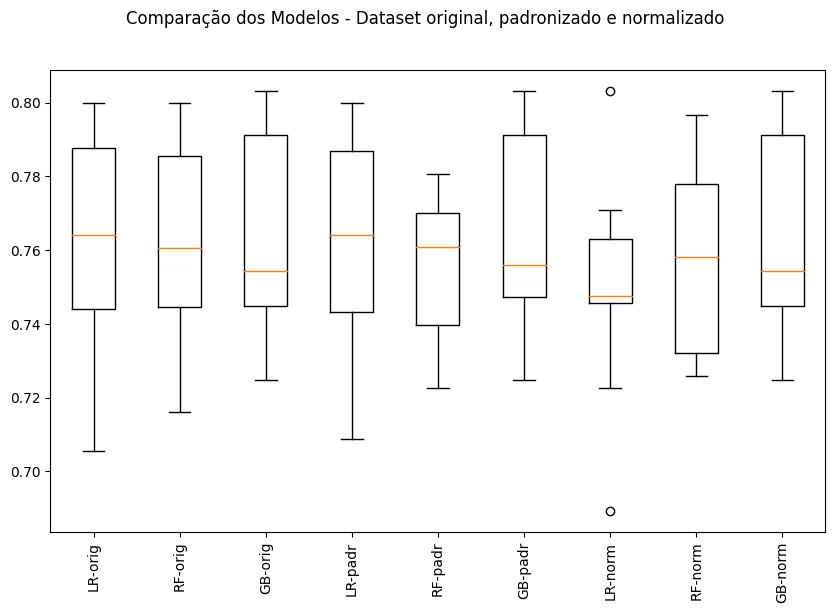

In [10]:
# Montando os pipelines

# Lista para armazenar os pipelines
pipelines = []

# Listas para aramazenar os resultados e os nomes dos modelos
results = []
names = []

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))

# Dataset padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))

# Dataset normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação de modelos selecionados
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização de Hiperparâmetros

Baseado no resultado da acurácia da execução dos Pipelines, foram selecionados os algoritmos de Regressão Logistica, Random Forest e Gradient Boosting, para a aplicação de hiperparâmetros a fim de encontrar o melhor modelo.

In [11]:
# tuning da Regressão Logistica

pipelines_reg_log = []

# definindo os componentes do pipeline
pipelines_reg_log.append(('LR-orig', Pipeline(steps=[reg_log])))
pipelines_reg_log.append(('LR-padr', Pipeline(steps=[standard_scaler, reg_log])))
pipelines_reg_log.append(('LR-norm', Pipeline(steps=[min_max_scaler, reg_log])))

param_grid= {
    'LR__penalty' : ['l1', 'l2'],
    'LR__solver' : ['lbfgs','newton-cg','liblinear'],
    'LR__max_iter' : [100, 1000,2500, 5000]
}

# prepara e executa o GridSearchCV
for name, model in pipelines_reg_log:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: LR-orig - Melhor: 0.765491 usando {'LR__max_iter': 100, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
Sem tratamento de missings: LR-padr - Melhor: 0.760643 usando {'LR__max_iter': 100, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
Sem tratamento de missings: LR-norm - Melhor: 0.752551 usando {'LR__max_iter': 1000, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}


In [12]:
# Tuning do Random Forest

pipelines_random_forest = []

# Definindo os componentes do pipeline
pipelines_random_forest.append(('RF-orig', Pipeline(steps=[random_forest])))
pipelines_random_forest.append(('RF-padr', Pipeline(steps=[standard_scaler, random_forest])))
pipelines_random_forest.append(('RF-norm', Pipeline(steps=[min_max_scaler, random_forest])))

param_grid = [{
    'RF__n_estimators':[10,100,200],
    'RF__max_features':[1,3],
}]

# prepara e executa o GridSearchCV
for name, model in pipelines_random_forest:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: RF-orig - Melhor: 0.760323 usando {'RF__max_features': 3, 'RF__n_estimators': 200}
Sem tratamento de missings: RF-padr - Melhor: 0.761932 usando {'RF__max_features': 3, 'RF__n_estimators': 200}
Sem tratamento de missings: RF-norm - Melhor: 0.758057 usando {'RF__max_features': 3, 'RF__n_estimators': 200}


In [13]:
# Tuning do Gradient Boosting

pipelines_gradient_boosting = []

# Definindo os componentes do pipeline
pipelines_gradient_boosting.append(('GB-orig', Pipeline(steps=[gradient_boosting])))
pipelines_gradient_boosting.append(('GB-padr', Pipeline(steps=[standard_scaler, gradient_boosting])))
pipelines_gradient_boosting.append(('GB-norm', Pipeline(steps=[min_max_scaler, gradient_boosting])))

param_grid = [{
    'GB__n_estimators':[10,100,200],
    'GB__max_features':[1,3],
}]

# prepara e executa o GridSearchCV
for name, model in pipelines_gradient_boosting:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    msg = "Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)
    print(msg)

Sem tratamento de missings: GB-orig - Melhor: 0.763864 usando {'GB__max_features': 3, 'GB__n_estimators': 200}
Sem tratamento de missings: GB-padr - Melhor: 0.761930 usando {'GB__max_features': 1, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-norm - Melhor: 0.767414 usando {'GB__max_features': 3, 'GB__n_estimators': 100}


Execução do modelo com configuração de hiperparâmetros e dados de teste.

In [14]:
# avaliação do modelo com o conjunto de testes

# preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

reg_log = ('LR', LogisticRegression(max_iter=100, penalty='l2', solver='lbfgs'))
model = Pipeline([reg_log])

model.fit(rescaledX, y_train)

# estimativa da acurácia no conjunto de teste
rescaledTextX = scaler.transform(X_test)
predictions = model.predict(rescaledTextX)
print(accuracy_score(y_test, predictions))

0.7733433734939759


### Sumário

Na preparação do modelo para uso na classificação do dataset, foi feita uma operação de seleção de atributos. A operação de redução no número de atríbutos permitiu um desempenho melhor na execução do algoritmo de classificação. Na busca do melhor modelo, foi utilizada cross-validation e a criação de pipelines de modelos. A otimização de hiperparâmetros implementada evidenciou que o algoritmo de Regressão Logistica apresentou o melhor resultado considerando a acurácia obtida na execução do modelo.

## Fim notebook modelo Clássico

### ________________________________________________

### ________________________________________________

## Notebook modelo Deep Learning - Classificador de imagens do dataset CIFAR10

**Descrição do Problema** - Criar um modelo de visão computacional para classificar uma imagem em alguma das categorias presentes no dataset CIPHAR10.

**Dataset** - O dataset CIFAR-10 é composto por 60000 imagens a cores 32x32 em 10 classes, com 6000 imagens por classe. Existem 50000 imagens de treino e 10000 imagens de teste. 

As classes presentes no dataset são: airplane, automobile, bird, cat, deer, dog, frog, horse, ship e truck.

### Importação de bibliotecas

In [15]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import sklearn.metrics as skm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Verifica disponibilidade de GPU

In [16]:
gpu_dev_name = tf.test.gpu_device_name()
if gpu_dev_name != '/device:GPU:0':
  print('GPU não encontrada')
else:
    print('GPU encontrada em: {}'.format(gpu_dev_name))

GPU não encontrada


### Funções utilitárias

In [17]:
# Prepara dataframe com os dados lidos a partir do dataset CIFAR10 
def prepare_dataset(X_dataset, y_dataset, classes, n_samples):
    if n_samples is None:
        img_samples = X_dataset.shape[0]
    else:
        img_samples = n_samples

    df_aux = pd.DataFrame(columns=['id', 'label'])

    list_aux = []

    for i in range(img_samples):
        nm_file = str(i)+'-'+str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')+'.'+'png'
        sample = {'id':nm_file, 'label':str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')}
        list_aux.append(sample)

    return pd.concat([df_aux, pd.DataFrame(list_aux)], ignore_index=True)

# Cria arquivos nos diretórios de trabalho com as imagens contidas no dataset CIFAR10
def create_files(X_dataset, y_dataset, classes, dir, n_samples):
    if n_samples is None:
        img_samples = X_dataset.shape[0]
    else:
        img_samples = n_samples

    for i in range(img_samples):
        nm_file = str(i)+'-'+str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')+'.'+'png'
        img = X_dataset[i]
        plt.imsave(dir + nm_file, img)

# Cria os diretórios de trabalho usados no processamento do código no notebook
def create_directory(dir):
    if os.path.exists(dir):
        delete_files(dir)
    else:
        os.makedirs(dir)

# Exclui arquivos em diretório
def delete_files(dir):
    for file in os.listdir(dir):
        os.remove(dir+file)

# Plota gráfico com a evolução do valor loss em função da época
def plot_loss(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss X epoch')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Plota gráfico com a evolução do valor accuracy em função da época
def plot_accuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy X epoch')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Plota matriz de confusão
def plot_confusion_matrix(actual, predicted, class_names):
    cnf_matrix = confusion_matrix(actual, predicted, labels=class_names)
    np.set_printoptions(precision=2)

    fig, ax = plt.subplots(figsize=(5, 5))
    cax = ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3, interpolation = 'nearest')
    plt.gca().xaxis.tick_bottom()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center')

    fig.colorbar(cax)

    plt.xlabel('Predição', fontsize=13)
    plt.ylabel('Real', fontsize=13)
    plt.title('Matriz de Confusão', fontsize=18)
    plt.show()

# Define configuração do modelo 1
def model1(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model1 = models.Sequential()

    model1.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Flatten())
    model1.add(layers.Dense(512, activation='relu'))
    model1.add(layers.Dense(10, activation='softmax'))
    
    loss, accuracy = execute_model(model1, p_train_generator, p_valid_generator, p_test_generator, p_train_step_size, p_validation_step_size, p_epochs)

    return model1, loss, accuracy

# Define configuração do modelo 2
def model2(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model2 = models.Sequential()

    model2.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Flatten())
    model2.add(layers.Dense(512, activation='relu'))
    model2.add(layers.Dropout(0.25))
    model2.add(layers.Dense(10, activation='softmax'))

    loss, accuracy = execute_model(model2, p_train_generator, p_valid_generator, p_test_generator, p_train_step_size, p_validation_step_size, p_epochs)

    return model2, loss, accuracy

# Define configuração do modelo 3
def model3(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model3 = models.Sequential()

    model3.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Flatten())
    model3.add(layers.Dense(512, activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.Dropout(0.25))
    model3.add(layers.Dense(10, activation='softmax'))

    loss, accuracy = execute_model(model3, p_train_generator, p_valid_generator, p_test_generator, p_train_step_size, p_validation_step_size, p_epochs)

    return model3, loss, accuracy

# Define configuração do modelo 4
def model4(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model4 = models.Sequential()

    model4.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Flatten())
    model4.add(layers.Dense(512, activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.Dense(10, activation='softmax'))

    loss, accuracy = execute_model(model4, p_train_generator, p_valid_generator, p_test_generator, p_train_step_size, p_validation_step_size, p_epochs)

    return model4, loss, accuracy

# Executa modelo
def execute_model(p_model, p_train_generator, p_valid_generator, p_test_generator, p_train_step_size, p_validation_step_size, p_epochs):
    p_model.summary()
    
    history = compile_fit_model(p_model, p_train_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs)

    loss, accuracy = display_result_model (p_model, p_test_generator, history)

    return loss, accuracy

# Processa a compilação e a função fit em um modelo
def compile_fit_model(p_model, p_train_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    p_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = p_model.fit_generator(generator=p_train_generator,
          validation_data=p_valid_generator,
          steps_per_epoch=p_train_step_size,
          validation_steps=p_validation_step_size,
          epochs=p_epochs)
    
    return history

# Apresenta resultados do processamento de determinada operação no modelo
def display_result_model (p_model, p_test_generator, p_history):
    plot_loss(p_history)
    plot_accuracy(p_history)

    loss, accuracy = p_model.evaluate_generator(p_test_generator)
    print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

    return loss, accuracy

# Plota informações sobre um dataset
def plot_dataset_class(p_dataset, p_title):
    print((p_dataset['label']).value_counts())
    p_dataset['label'].value_counts().plot.bar(title=p_title)


### Carga e preparação dos dados

Carrega o dataset, separa entre treino e teste e monta a lista de classes das imagens.

In [18]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Cria os diretórios de trabalho.

In [19]:
train_dir = "./train/"
test_dir = "./test/" 

create_directory(train_dir)
create_directory(test_dir)

Define o tamanho das amostras de treino e teste usadas no processamento do notebook.

In [20]:
v_train_samples = X_train.shape[0]
v_test_samples = X_test.shape[0]

Cria os arquivos de imagens de treinamento nos diretórios de trabalho e prepara o dataframe de treinamento usado no processamento do notebook.

In [21]:
train_samples = v_train_samples

create_files(X_train, y_train, cifar10_classes, train_dir, train_samples)

train_df = prepare_dataset(X_train, y_train, cifar10_classes, train_samples)

train_df.head()

,id,label
0,0-frog.png,frog
1,1-truck.png,truck
2,2-truck.png,truck
3,3-deer.png,deer
4,4-automobile.png,automobile


Cria os arquivos de imagens de teste nos diretórios de trabalho e prepara o dataframe de teste usado no processamento do notebook.

In [22]:
test_samples = v_test_samples

create_files(X_test, y_test, cifar10_classes, test_dir, test_samples)

test_df = prepare_dataset(X_test, y_test, cifar10_classes, test_samples)

test_df.head()

KeyboardInterrupt: 

Apresenta informações sobre os dados de treinamento.

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64


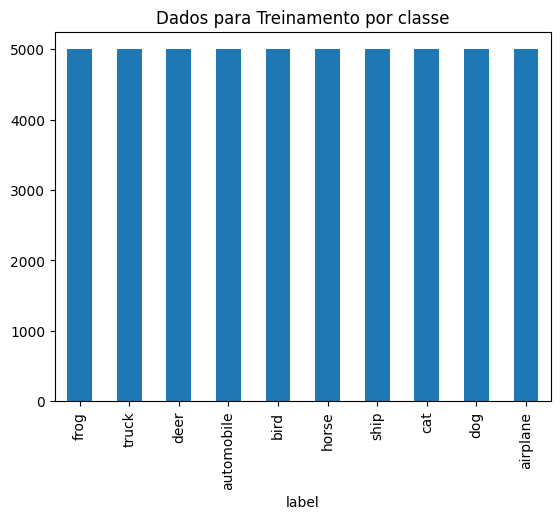

In [ ]:
plot_dataset_class(train_df, 'Dados para Treinamento por classe')

Apresenta informações sobre os dados de teste.

label
cat           1000
ship          1000
airplane      1000
frog          1000
automobile    1000
truck         1000
dog           1000
horse         1000
deer          1000
bird          1000
Name: count, dtype: int64


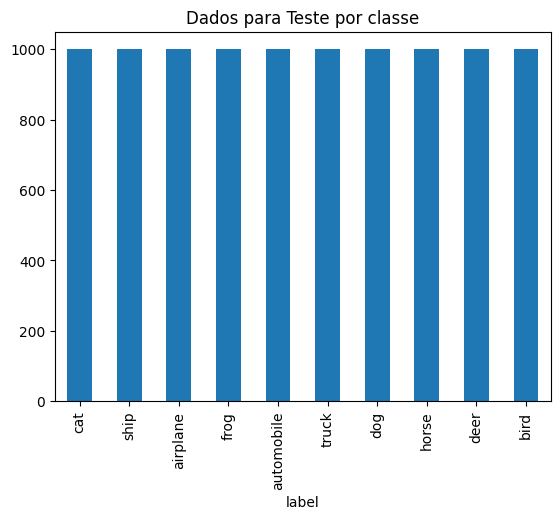

In [ ]:
plot_dataset_class(test_df, 'Dados para Teste por classe')

Apresenta o total de imagens nos diretórios de treinamento e de teste.

In [ ]:
print('Total de imagens para treinamento: %s' % len(os.listdir(train_dir)))
print('Total de imagens para teste      : %s' % len(os.listdir(test_dir)))

Total de imagens para treinamento: 50000
Total de imagens para teste      : 10000


Apresenta algumas imagens do dataset de treinamento.

Classes: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


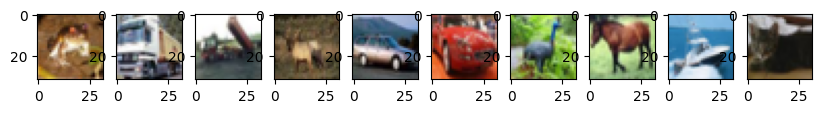

In [ ]:
fig, x = plt.subplots(1, 10)
fig.set_size_inches(10, 10)

print('Classes: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

for i in range(10):
    image = X_train[i]
    x[i].imshow(image)

plt.show()

### Pré-processamento dos dados

Utilizamos a classe **keras.preprocessing.image.ImageDataGenerator** que permite configurar transformações e operações de normalização nas imagens durante o treinamento, assim como instânciar batches de imagens aumentadas. Essas operações reduzem o overfitting e generalizam melhor o modelo.

Configuramos o **ImageDataGenerator** para separar um conjunto de validação com 25% das amostras do conjunto de treino.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                validation_split=0.25,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'                                
                                )

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory=train_dir,
x_col="id",
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

valid_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory=train_dir,
x_col="id",
y_col="label",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

Found 37500 validated image filenames belonging to 10 classes.
Found 12500 validated image filenames belonging to 10 classes.


Configuração dos dados de teste.

In [ ]:
test_datagen=ImageDataGenerator(rescale=1.0/255.0)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory=test_dir,
x_col="id",
y_col="label",
batch_size=32,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(32,32))

Found 10000 validated image filenames belonging to 10 classes.


### Modelagem e treinamento

Configura parâmetros usados no processo de treinamento.

In [ ]:
train_step_size = train_generator.n//train_generator.batch_size
validation_step_size = valid_generator.n//valid_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size

v_epochs = 30

**Configuração dos Modelos**

Foram configurados 4 modelos candidatos para o treinamento da rede. O modelo que tiver a melhor acurácia será o escolhido para o treinamento da rede.

**Modelo 1**

Este modelo apresenta uma construção com 4 camadas convolucionais. Sendo uma com 32 filtros, outra com 64 e duas com 128 filtros. Essas camadas tem um kernel de tamanho 3x3 e usam a ativição 'ReLU'. 
O modelo também tem camadas max-pooling com bloco 2×2.
A primeira camada convolucional recebe uma imagem 32x32.

Na sequência temos uma camada 'Flatten', seguida de duas camadas densas. Na última camada densa é usada a função de ativação 'Softmax' para a classificação do conjunto de imagens de acordo com a sua classe. 

    model1 = models.Sequential()

    model1.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Flatten())
    model1.add(layers.Dense(512, activation='relu'))
    model1.add(layers.Dense(10, activation='softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         1

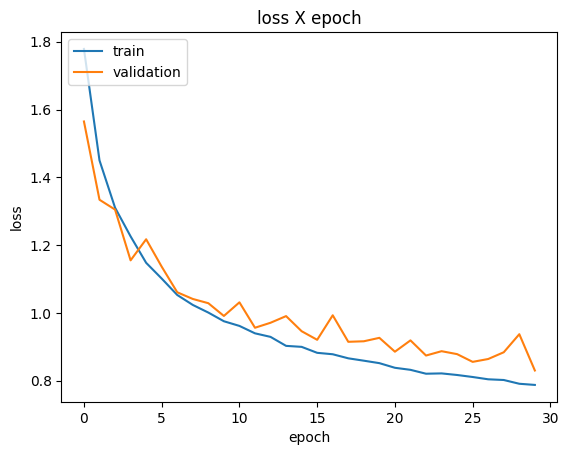

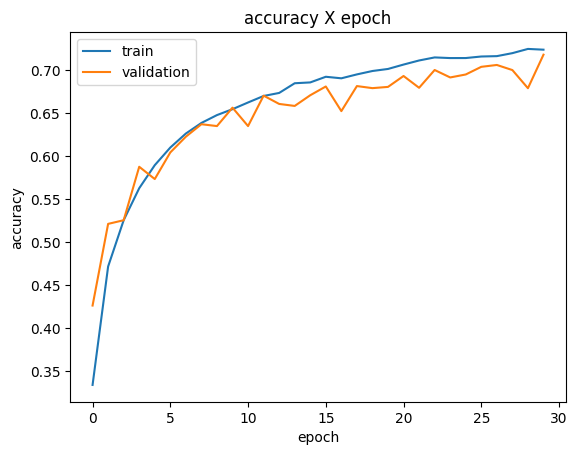

Test: accuracy = 0.748700  ;  loss = 0.744510 


In [ ]:
model1, loss1, accuracy1 = model1(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

**Modelo 2**

O Modelo 2 é baseado na arquitetura do Modelo 1. Nele foram acrescentadas algumas camadas de 'Dropout' com um percentual de 25%. O objetivo dessas camadas é reduzir o overfitting no treinamento.

    model2 = models.Sequential()

    model2.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Flatten())
    model2.add(layers.Dense(512, activation='relu'))
    model2.add(layers.Dropout(0.25))
    model2.add(layers.Dense(10, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                  

Epoch 1/30
1171/1171 [==============================] - 77s 65ms/step - loss: 1.8086 - accuracy: 0.3198 - val_loss: 1.5441 - val_accuracy: 0.4220
Epoch 2/30
1171/1171 [==============================] - 78s 67ms/step - loss: 1.5134 - accuracy: 0.4496 - val_loss: 1.3711 - val_accuracy: 0.4945
Epoch 3/30
1171/1171 [==============================] - 78s 67ms/step - loss: 1.3981 - accuracy: 0.4978 - val_loss: 1.3450 - val_accuracy: 0.5067
Epoch 4/30
1171/1171 [==============================] - 79s 68ms/step - loss: 1.3105 - accuracy: 0.5335 - val_loss: 1.2502 - val_accuracy: 0.5421
Epoch 5/30
1171/1171 [==============================] - 78s 66ms/step - loss: 1.2651 - accuracy: 0.5491 - val_loss: 1.1699 - val_accuracy: 0.5853
Epoch 6/30
1171/1171 [==============================] - 81s 69ms/step - loss: 1.2216 - accuracy: 0.5682 - val_loss: 1.1571 - val_accuracy: 0.5927
Epoch 7/30
1171/1171 [==============================] - 81s 69ms/step - loss: 1.1952 - accuracy: 0.5742 - val_loss: 1.0766 -

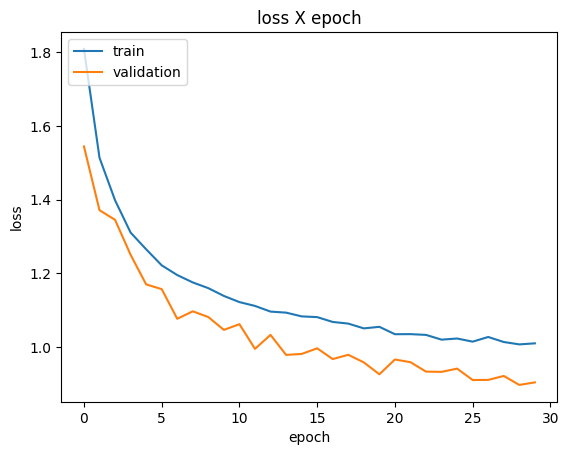

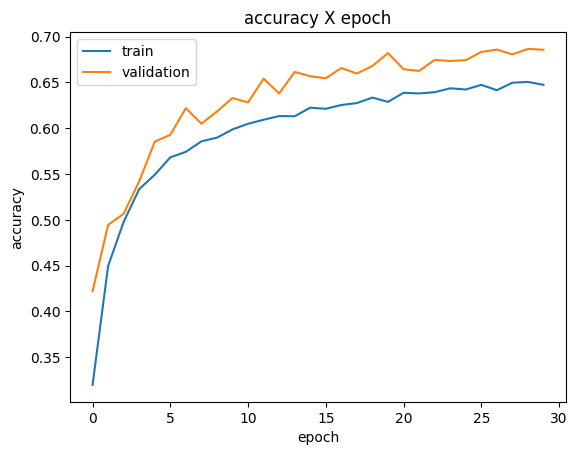

Test: accuracy = 0.731200  ;  loss = 0.793135 


In [ ]:
model2, loss2, accuracy2 = model2(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

**Modelo 3**

No Modelo 3 parte-se da configuração do Modelo 2 e são acrescentadas algumas camadas 'BatchNormalization'. A normalização da saída da camada vai aumentar a velocidade do treinamento e melhorar a performance do modelo.

    model3 = models.Sequential()

    model3.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Flatten())
    model3.add(layers.Dense(512, activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.Dropout(0.25))
    model3.add(layers.Dense(10, activation='softmax'))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)      

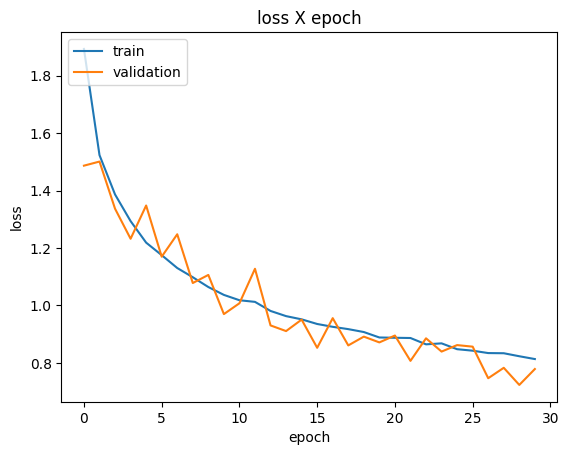

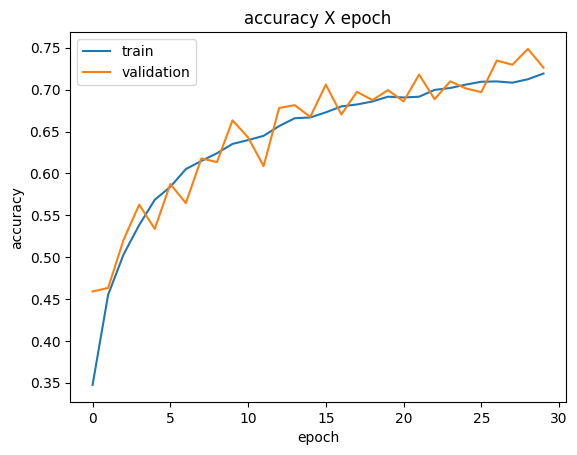

Test: accuracy = 0.761400  ;  loss = 0.682128 


In [ ]:
model3, loss3, accuracy3 = model3(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

**Modelo 4**

No Modelo 4 são retiradas as camadas de 'Dropout' do Modelo 3 e foi mantido o restante de sua configuração.

    model4 = models.Sequential()

    model4.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Flatten())
    model4.add(layers.Dense(512, activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.Dense(10, activation='softmax'))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_5 (Batc  (None, 12, 12, 128)     

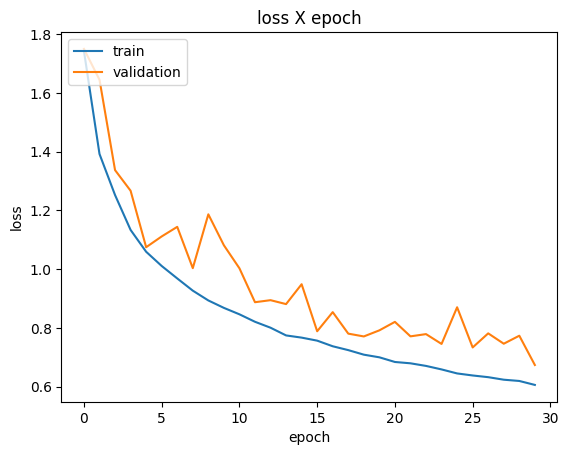

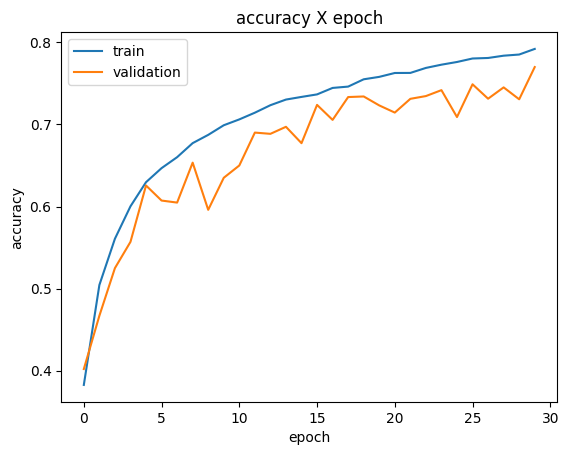

Test: accuracy = 0.804800  ;  loss = 0.590166 


In [ ]:
model4, loss4, accuracy4 = model4(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

### Resultado da execução do treinamento dos modelos

In [ ]:
print('Resultado dos Modelos')
print('---------------------------')
table_result_model = [[accuracy1, loss1], [accuracy2, loss2], [accuracy3, loss3], [accuracy4, loss4]]
df_result_model = pd.DataFrame(table_result_model, columns = ['accuracy', 'loss'], index=['Model 1', 'Model 2', 'Model 3', 'Model 4'])
print(df_result_model)

Resultado dos Modelos
---------------------------
         accuracy      loss
Model 1    0.7487  0.744510
Model 2    0.7312  0.793135
Model 3    0.7614  0.682128
Model 4    0.8048  0.590166


Considerando que o modelo 4 obteve os mehores resultados, o mesmo será escolhido para processamento com os dados de teste

In [ ]:
model = model4

Modelo escolhido: model4


### Execução do modelo com o conjunto de teste

Executando a predição.

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator)

Resultado da avaliação do modelo.

In [ ]:
loss, accuracy = model.evaluate_generator(test_generator)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.804800  ;  loss = 0.590166 


Métricas da performance do modelo com as imagens de teste.

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

test_generator.reset()

count = 0
actuals = list()

for batch in test_generator:
    count+=1
    if count == len(test_generator)+1:
        break
    else:
        images = batch[0]
        labels = batch[1]
        for i in range(len(images)):
            label = labels[i]
            labeled_class = np.argmax(label)
            label = cifar10_classes[int(labeled_class)]
            actuals.append(label)

accuracy = skm.accuracy_score(actuals, predictions)
precision = skm.precision_score(actuals, predictions, average='weighted')
recall = skm.recall_score(actuals, predictions, average='weighted')
f1score = skm.f1_score(actuals, predictions, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Accuracy:  0.8048
Precision:  0.8108821052798453
Recall:  0.8048
F1 Score:  0.8010719015167929


Matriz de Confusão.

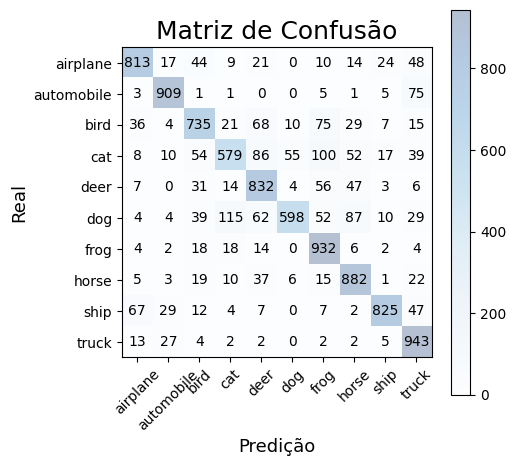

In [ ]:
plot_confusion_matrix(actuals, predictions, cifar10_classes)

### Exportação do modelo

Salvando o modelo selecionado.

In [ ]:
model_dir = "./trained_models/"
create_directory(model_dir)

model_name = 'trained_model_deep_learning.h5'

model.save("%s/%s" % (model_dir, model_name))
print("Modelo salvo com o nome: ", model_name)

Modelo salvo com o nome:  trained_model_deep_learning.h5


### Teste do modelo exportado

Carregando o modelo salvo.

In [ ]:
model_loaded = keras.models.load_model("%s/%s" % (model_dir, model_name))
print("Modelo %s carregado com sucesso" % (model_name))

Modelo trained_model_deep_learning.h5 carregado com sucesso


Execução do modelo salvo com um subconjunto do dataset de teste

1/1 [==============================] - 0s 93ms/step


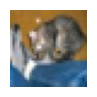

Label:  cat
Previsão:  cat
Probabilidade:  0.97408336


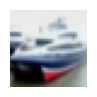

Label:  ship
Previsão:  ship
Probabilidade:  0.83898413


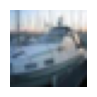

Label:  ship
Previsão:  ship
Probabilidade:  0.64412695


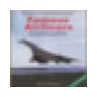

Label:  airplane
Previsão:  airplane
Probabilidade:  0.8710222


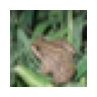

Label:  frog
Previsão:  frog
Probabilidade:  0.9999807


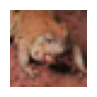

Label:  frog
Previsão:  frog
Probabilidade:  0.99983513


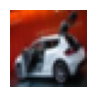

Label:  automobile
Previsão:  automobile
Probabilidade:  0.9775333


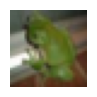

Label:  frog
Previsão:  frog
Probabilidade:  0.99359494


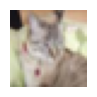

Label:  cat
Previsão:  cat
Probabilidade:  0.8598041


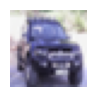

Label:  automobile
Previsão:  automobile
Probabilidade:  0.4538015


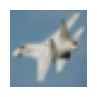

Label:  airplane
Previsão:  airplane
Probabilidade:  0.94569427


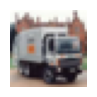

Label:  truck
Previsão:  truck
Probabilidade:  0.99998665


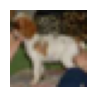

Label:  dog
Previsão:  frog
Probabilidade:  0.49966928


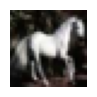

Label:  horse
Previsão:  horse
Probabilidade:  0.99896014


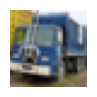

Label:  truck
Previsão:  truck
Probabilidade:  0.99144226


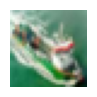

Label:  ship
Previsão:  ship
Probabilidade:  0.6004581


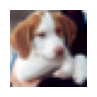

Label:  dog
Previsão:  dog
Probabilidade:  0.39085612


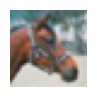

Label:  horse
Previsão:  horse
Probabilidade:  0.70768964


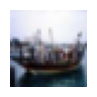

Label:  ship
Previsão:  ship
Probabilidade:  0.99795014


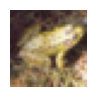

Label:  frog
Previsão:  frog
Probabilidade:  0.99999964


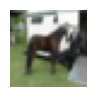

Label:  horse
Previsão:  horse
Probabilidade:  0.691558


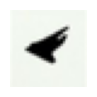

Label:  airplane
Previsão:  bird
Probabilidade:  0.71981716


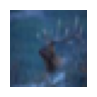

Label:  deer
Previsão:  deer
Probabilidade:  0.9995103


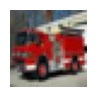

Label:  truck
Previsão:  truck
Probabilidade:  0.9999933


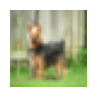

Label:  dog
Previsão:  deer
Probabilidade:  0.7549296


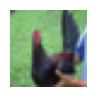

Label:  bird
Previsão:  bird
Probabilidade:  0.76010466


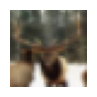

Label:  deer
Previsão:  deer
Probabilidade:  0.92455363


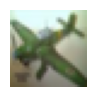

Label:  airplane
Previsão:  bird
Probabilidade:  0.3720706


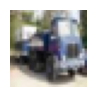

Label:  truck
Previsão:  truck
Probabilidade:  0.99867463


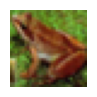

Label:  frog
Previsão:  frog
Probabilidade:  0.99981767


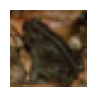

Label:  frog
Previsão:  frog
Probabilidade:  0.9854026


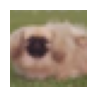

Label:  dog
Previsão:  dog
Probabilidade:  0.99218893
1/1 [==============================] - 0s 26ms/step


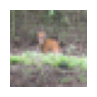

Label:  deer
Previsão:  deer
Probabilidade:  0.94343245


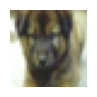

Label:  dog
Previsão:  cat
Probabilidade:  0.46656016


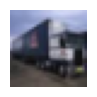

Label:  truck
Previsão:  truck
Probabilidade:  0.9999956


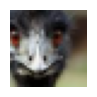

Label:  bird
Previsão:  ship
Probabilidade:  0.6700141


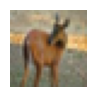

Label:  deer
Previsão:  deer
Probabilidade:  0.7703838


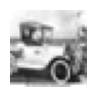

Label:  automobile
Previsão:  automobile
Probabilidade:  0.9194528


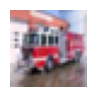

Label:  truck
Previsão:  truck
Probabilidade:  0.99999964


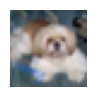

Label:  dog
Previsão:  dog
Probabilidade:  0.94378966


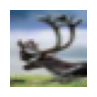

Label:  deer
Previsão:  deer
Probabilidade:  0.99519026


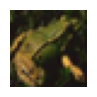

Label:  frog
Previsão:  frog
Probabilidade:  0.9982622


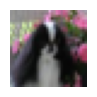

Label:  dog
Previsão:  cat
Probabilidade:  0.4923581


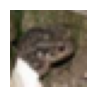

Label:  frog
Previsão:  frog
Probabilidade:  0.999678


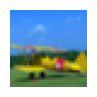

Label:  airplane
Previsão:  airplane
Probabilidade:  0.9144637


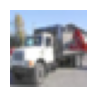

Label:  truck
Previsão:  truck
Probabilidade:  0.9999925


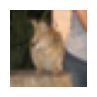

Label:  cat
Previsão:  cat
Probabilidade:  0.6519886


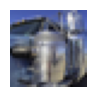

Label:  truck
Previsão:  truck
Probabilidade:  0.625702


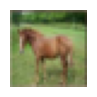

Label:  horse
Previsão:  horse
Probabilidade:  0.9984049


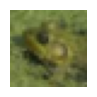

Label:  frog
Previsão:  frog
Probabilidade:  0.7098919


In [ ]:
test_generator.reset()

count = 0
y_pred = list()
y_true = list()

img_count = 0
max_img = 50

for batch in test_generator:
    count+=1

    if count == len(test_generator)+1 or img_count > max_img:
        break

    else:
        images = batch[0]
        labels = batch[1]

        predictions = model_loaded.predict(images)

        for i in range(len(images)):
            img_count+=1

            if img_count > max_img:
                break
            else:
                image = images[i]
                label = labels[i]

                prediction = predictions[i]

                predicted_class = np.argmax(prediction)
                probability = prediction[predicted_class]
                class_name = cifar10_classes[int(predicted_class)]

                labeled_class = np.argmax(label)
                label = cifar10_classes[int(labeled_class)]

                y_true.append(label)
                y_pred.append(class_name)
                
                fig, x = plt.subplots(1, 1)
                fig.set_size_inches(1, 1)

                plt.imshow(images[i])
                plt.axis('Off')
                plt.show()
                
                print("Label: ", label)
                print("Previsão: ", class_name) 
                print("Probabilidade: ", probability) 

### Sumário

Dos modelos considerados, o que obteve a melhor acurácia foi o modelo 4. Ele se mostrou melhor que o modelo 3 que é um modelo que além das camadas convolucionais e densas também tem as camadas Dropout e BatchNormalization. No modelo 4 foi retirada a camada Dropout, sendo mantida a camada BatchNormalization. Com a simplificação do modelo 4 seu tempo de processamento foi menor do que o modelo 3. Avaliando a matriz de confusão, as classes que tiveram as maiores dificuldades para a classificação, foram as classes cat e dog, isso aconteceu provavelmente por conta de semelhanças que as duas classes apresentam. Apesar da complexidade pode-se considerar que o resultado da classificação das imagens foi satisfatório, com o modelo implentado tendo uma boa acurácia.

## Fim notebook modelo Deep Learning